# Merge sensor data with MET lables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


os.chdir("E:\Projects\Oulu\Data Mining Project\DataMiningProject")
pd.set_option("display.precision", 2)

In [2]:
participants_list = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17']

## Load MET

In [3]:
MET_all_list = [pd.read_pickle(f"preprocessed_dataset/{participant}/MET.pkl") for participant in participants_list]
MET_all_list[0]


,Time[s],Delta_Time,MET
Time,,,
2021-12-03 16:58:51,1.0,0 days 00:00:00,1.31
2021-12-03 16:58:52,2.0,0 days 00:00:01,1.31
2021-12-03 16:58:53,3.0,0 days 00:00:02,1.52
2021-12-03 16:58:54,4.0,0 days 00:00:03,1.63
2021-12-03 16:58:55,5.0,0 days 00:00:04,1.56
...,...,...,...
2021-12-03 17:28:48,1798.0,0 days 00:29:57,5.32
2021-12-03 17:28:49,1799.0,0 days 00:29:58,5.11
2021-12-03 17:28:50,1800.0,0 days 00:29:59,4.46


## Merge E4 ACC data with MET

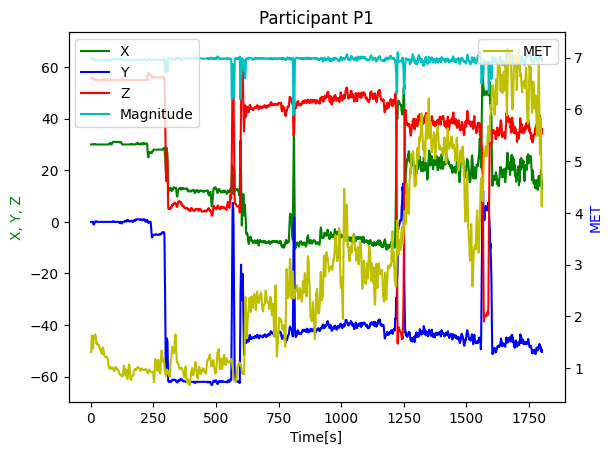

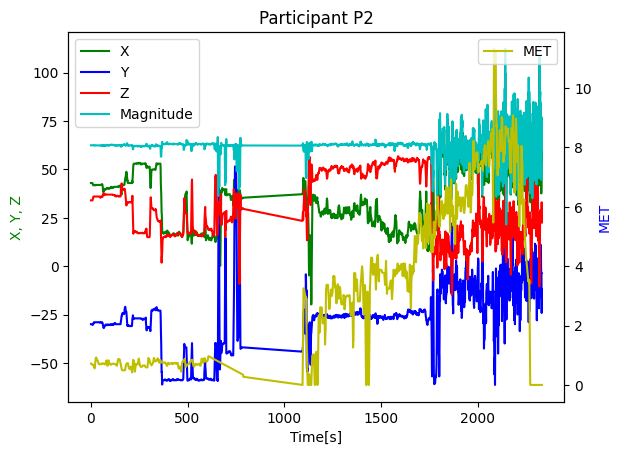

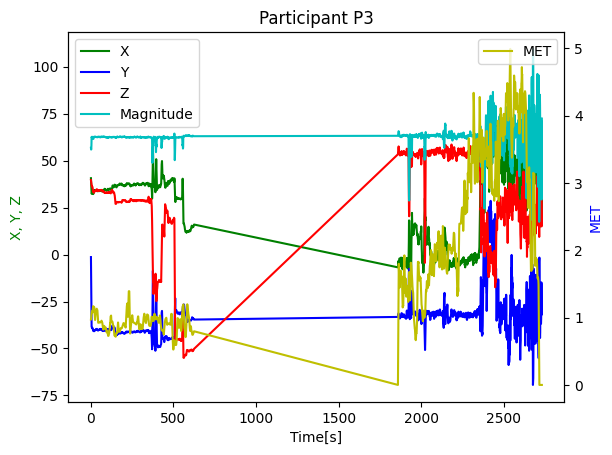

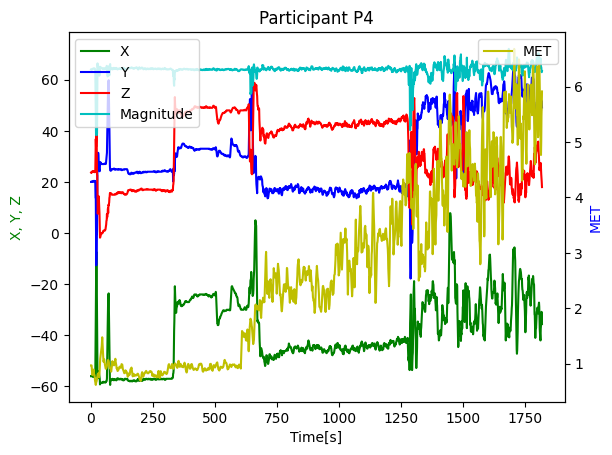

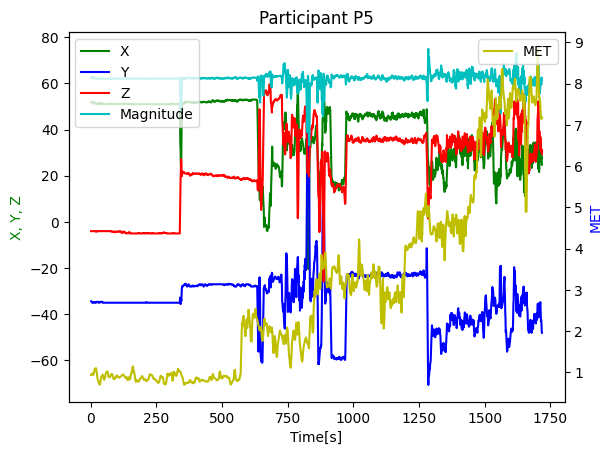

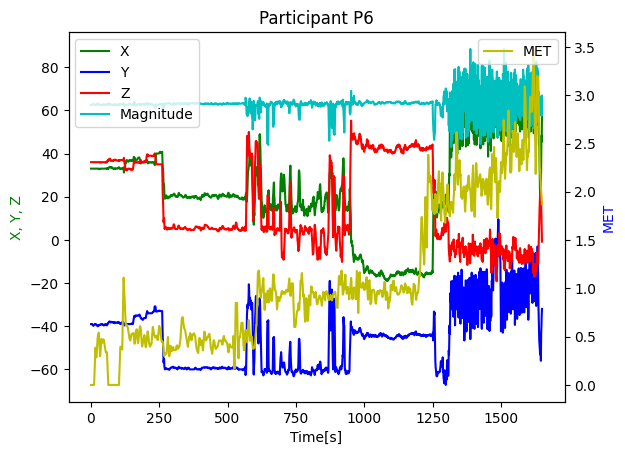

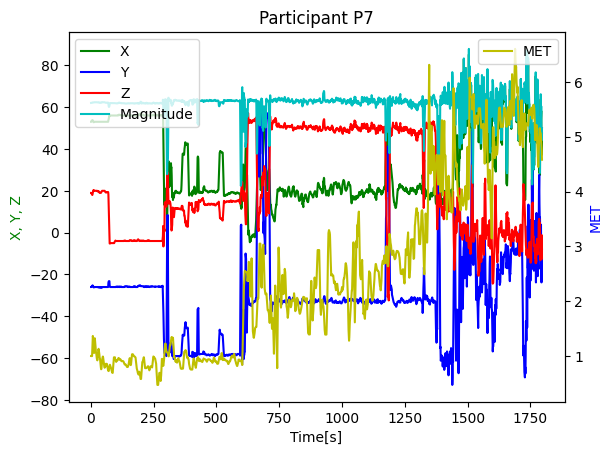

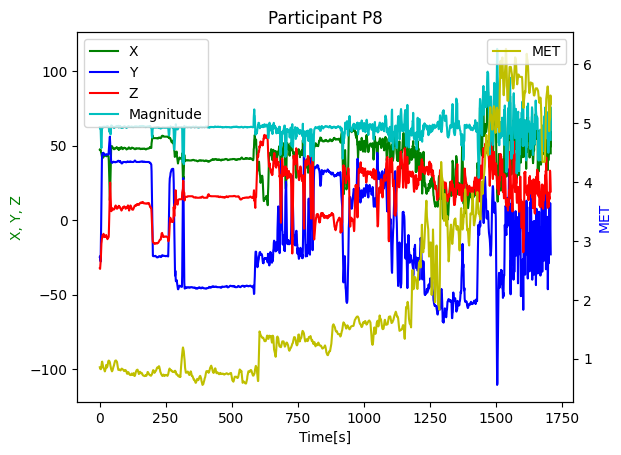

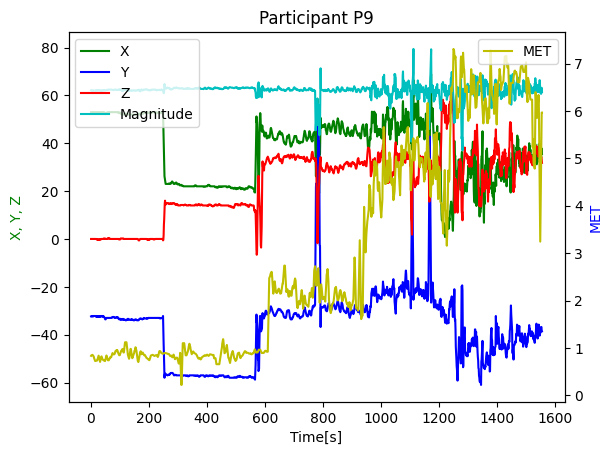

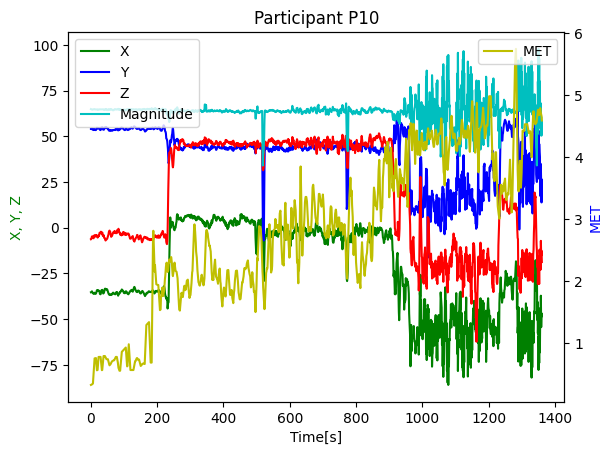

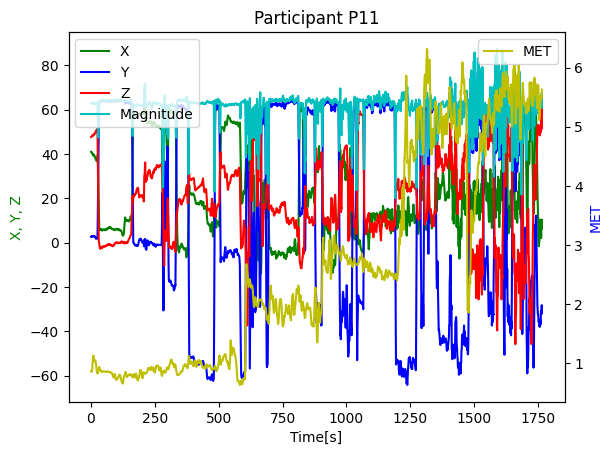

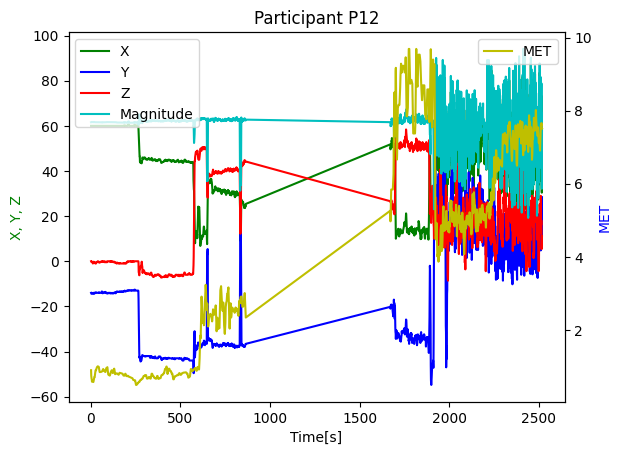

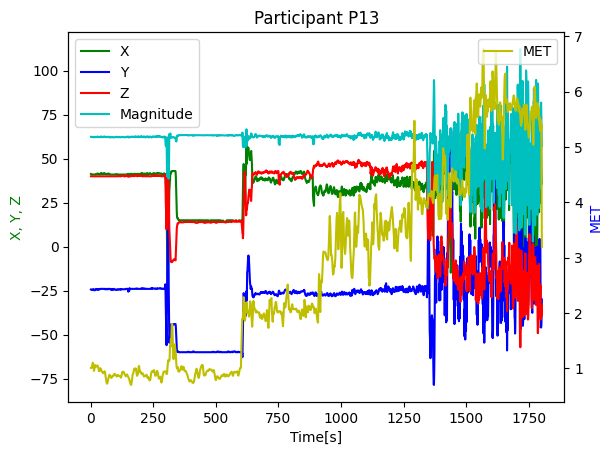

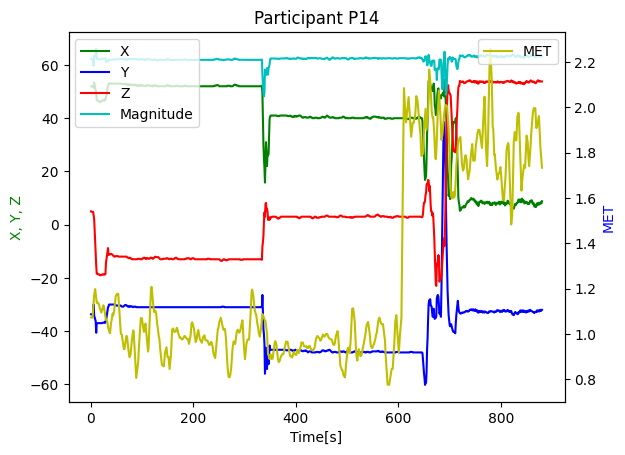

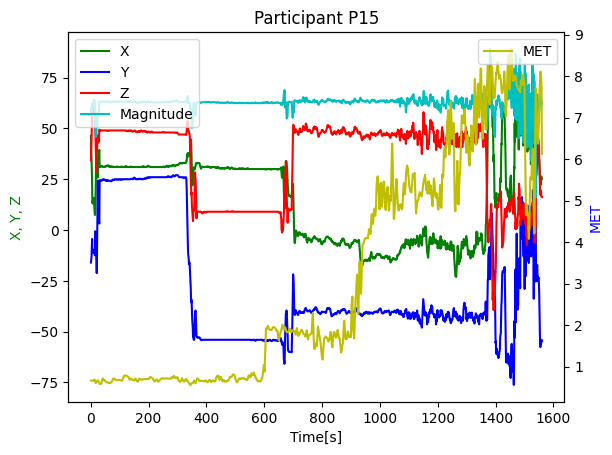

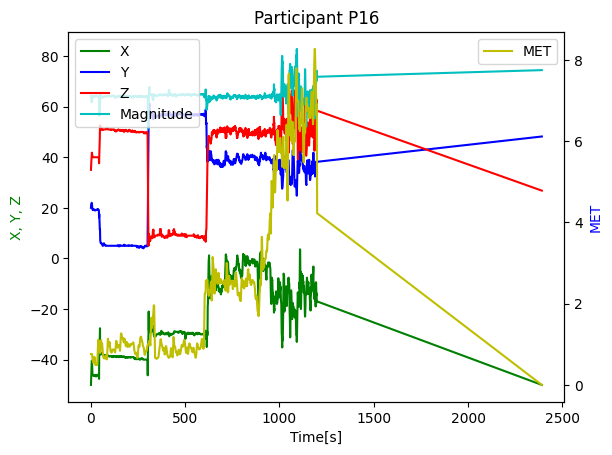

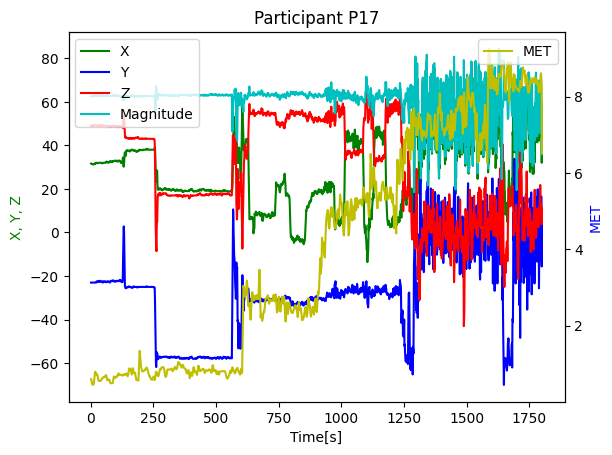

: 

In [15]:
E4_all_list = [pd.read_pickle(f"preprocessed_dataset/{participant}/ACC_E4.pkl") for participant in participants_list]
# Go through E4 data, and floor each time value, leaving decimal part to 0
for E4 in E4_all_list:
    E4['Time[s]'] = E4['Time[s]'].apply(np.floor)
# Combine MET and E4 data, on Time[s] column. If there is no matching time, the row is dropped
combined_data = [pd.merge(MET, E4, on='Time[s]', how='outer') for MET, E4 in zip(MET_all_list, E4_all_list)]

for i in range(len(combined_data)):
    # plot just X, Y and Z on time. Plot the MET value on the same graph, but on y-axis 2
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    # Remove the ACC data rows where MET is NaN
    combined_data[i] = combined_data[i][~combined_data[i]['MET'].isna()]
    ax1.plot(combined_data[i]['Time[s]'], combined_data[i]['X'], 'g-')
    ax1.plot(combined_data[i]['Time[s]'], combined_data[i]['Y'], 'b-')
    ax1.plot(combined_data[i]['Time[s]'], combined_data[i]['Z'], 'r-')
    ax1.plot(combined_data[i]['Time[s]'], combined_data[i]['Magnitude'], 'c-')
    ax2.plot(combined_data[i]['Time[s]'], combined_data[i]['MET'], 'y-')
    ax1.set_xlabel('Time[s]')
    ax1.set_ylabel('X, Y, Z', color='g')
    ax2.set_ylabel('MET', color='b')
    ax1.set_title(f'Participant {participants_list[i]}')
    ax1.legend(['X', 'Y', 'Z', 'Magnitude'], loc='upper left')
    ax2.legend(['MET'], loc='upper right')
    plt.show()
    



## Save Merged E4 data

In [6]:
# Save merged data to pickle files
merged_dataset_dir = "merged_dataset"
if not os.path.exists(merged_dataset_dir):
    os.makedirs(merged_dataset_dir)
for i in range(len(combined_data)):
    if not os.path.exists(f"{merged_dataset_dir}/{participants_list[i]}"):
        os.makedirs(f"{merged_dataset_dir}/{participants_list[i]}")
    combined_data[i].to_pickle(f"{merged_dataset_dir}/{participants_list[i]}/E4.pkl")
    print(f"Saved {participants_list[i]}.pkl")

Saved P1.pkl
Saved P2.pkl
Saved P3.pkl
Saved P4.pkl
Saved P5.pkl
Saved P6.pkl
Saved P7.pkl
Saved P8.pkl
Saved P9.pkl
Saved P10.pkl
Saved P11.pkl
Saved P12.pkl
Saved P13.pkl
Saved P14.pkl
Saved P15.pkl
Saved P16.pkl
Saved P17.pkl
